# **Métricas para clasificación:**

**Precisión (Accuracy):** Proporción de predicciones correctas.

**Matriz de Confusión:** Tabla que muestra las verdaderas etiquetas frente a las predicciones.

**Precisión (Precision):** Proporción de verdaderos positivos sobre el total de positivos predichos.

**Recall:** Proporción de verdaderos positivos sobre el total de positivos reales.

**F1 Score:** Media armónica de precisión y recall.

**AUC-ROC:** Área bajo la curva ROC, útil para problemas de clasificación binaria.

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [15]:
# Cargar el dataset
iris = load_iris()
X, y = iris.data, iris.target

In [16]:
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['target'] = iris_df['target'].map({i: name for i, name in enumerate(iris.target_names)})

In [17]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Predecir
y_pred = model.predict(X_test)

In [22]:
# Evaluar
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


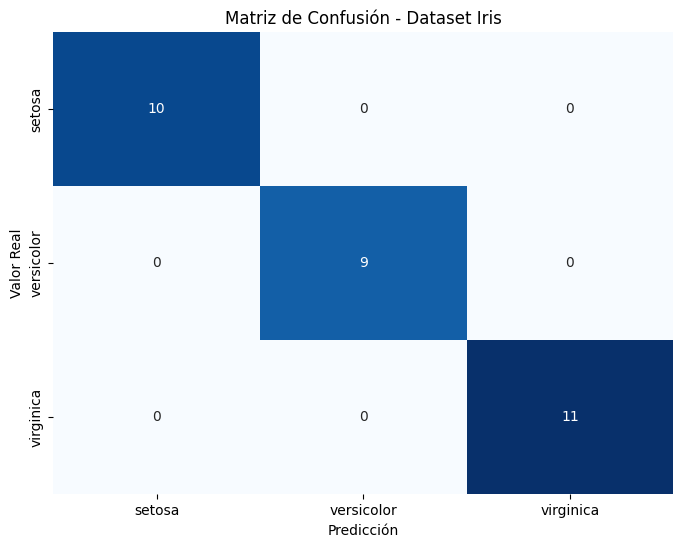

In [23]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Dataset Iris')
plt.show()

## **Matriz de Confusión**

La matriz de confusión es una tabla que permite visualizar el desempeño de un modelo de clasificación, mostrando el número de predicciones correctas e incorrectas realizadas por el modelo, distribuidas según las clases verdaderas y las predichas. Es fundamental para calcular muchas de las métricas utilizadas para evaluar modelos de clasificación.

**Organización de la Matriz de Confusión:** En una matriz de confusión típica para un problema de clasificación binaria, las filas representan las clases reales (lo que realmente sucedió) y las columnas representan las predicciones del modelo (lo que el modelo predijo).


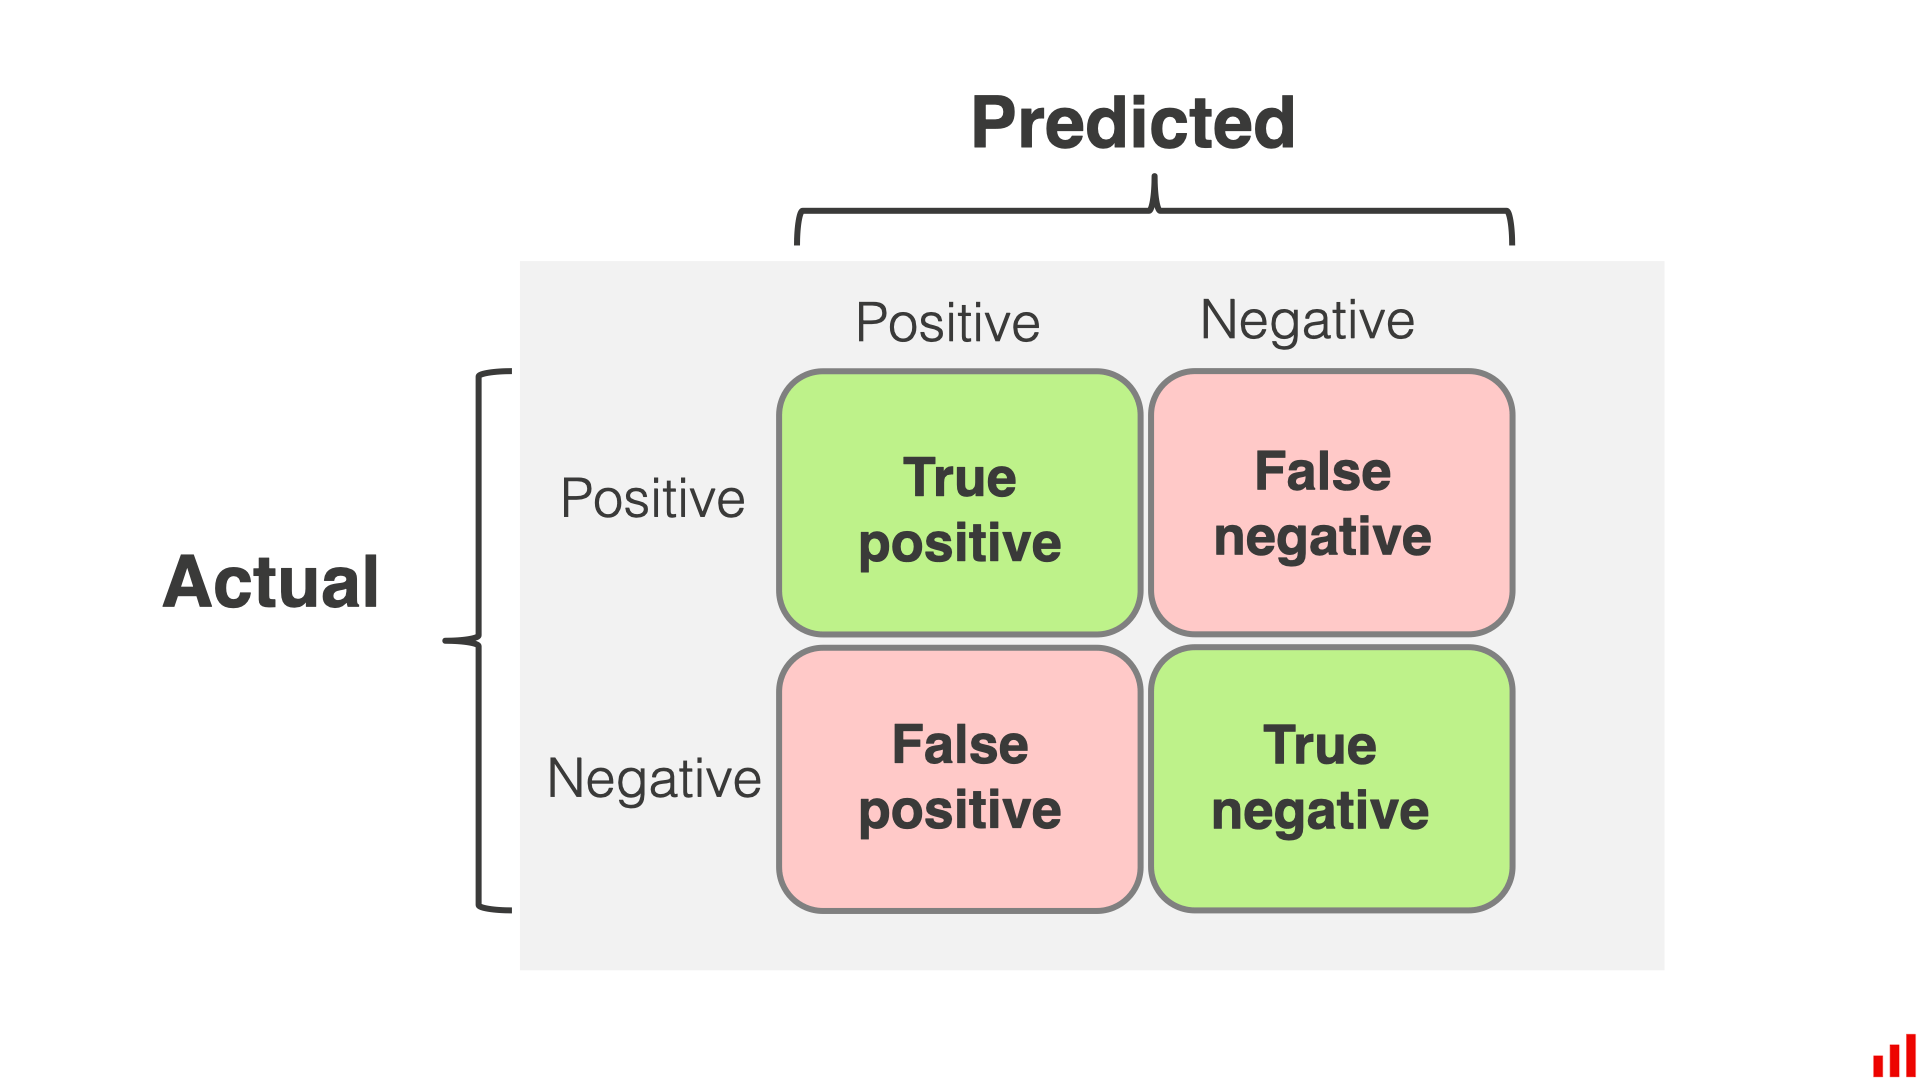

|                      | **Predicción: Positivo** | **Predicción: Negativo** |
|----------------------|--------------------------|---------------------------|
| **Clase Real: Positivo** | Verdaderos Positivos (TP) | Falsos Negativos (FN)     |
| **Clase Real: Negativo** | Falsos Positivos (FP)     | Verdaderos Negativos (TN)  |

**Componentes Clave de la Matriz de Confusión:**

**Verdaderos Positivos (TP):**

Casos en los que el modelo predice correctamente la clase positiva (el modelo predijo positivo y realmente era positivo).

**Verdaderos Negativos (TN):**

Casos en los que el modelo predice correctamente la clase negativa (el modelo predijo negativo y realmente era negativo).

**Falsos Positivos (FP):**

Casos en los que el modelo predice la clase positiva de forma incorrecta (el modelo predijo positivo, pero en realidad era negativo). También conocido como error de tipo I.

**Falsos Negativos (FN):**

Casos en los que el modelo predice la clase negativa de forma incorrecta (el modelo predijo negativo, pero en realidad era positivo). También conocido como error de tipo II.

Supongamos que estamos trabajando con un modelo de clasificación binaria que predice si un paciente tiene una enfermedad (Positivo) o no (Negativo). El modelo fue probado en 100 pacientes, y la siguiente es su matriz de confusión:

|                      | **Predicción: Positivo** | **Predicción: Negativo** |
|----------------------|--------------------------|---------------------------|
| **Clase Real: Positivo** | 50 (TP)                 | 10 (FN)                   |
| **Clase Real: Negativo** | 5 (FP)                  | 35 (TN)                   |

**Interpretación:**

Verdaderos Positivos (TP = 50): El modelo predijo correctamente que 50 pacientes tienen la enfermedad.

Verdaderos Negativos (TN = 35): El modelo predijo correctamente que 35 pacientes no tienen la enfermedad.

Falsos Positivos (FP = 5): El modelo predijo que 5 pacientes tenían la enfermedad cuando en realidad no la tenían.

Falsos Negativos (FN = 10): El modelo no detectó que 10 pacientes tenían la enfermedad cuando realmente la tenían.

Este tipo de matriz nos permite calcular otras métricas importantes como la exactitud, la precisión, el recall, y el F1 score.

Ahora, imaginemos un modelo que clasifica flores en tres especies: Iris-setosa, Iris-versicolor e Iris-virginica. La matriz de confusión para este modelo podría verse de la siguiente manera:

|                      | **Predicción: Setosa** | **Predicción: Versicolor** | **Predicción: Virginica** |
|----------------------|------------------------|----------------------------|----------------------------|
| **Clase Real: Setosa**     | 40                     | 5                          | 0                          |
| **Clase Real: Versicolor** | 2                      | 35                         | 8                          |
| **Clase Real: Virginica**  | 0                      | 3                          | 37                         |

Interpretación:

Clase Setosa (40 TP, 5 FP): El modelo predijo correctamente 40 casos como Iris-setosa, pero clasificó 5 erróneamente como Versicolor.

Clase Versicolor (35 TP, 10 FP/FN): El modelo identificó correctamente 35 como Versicolor, pero 2 casos de Setosa fueron clasificados incorrectamente como Versicolor, y 8 casos de Versicolor fueron mal clasificados como Virginica.

Clase Virginica (37 TP, 3 FP): El modelo predijo correctamente 37 casos de Virginica, pero mal clasificó 3 Versicolor como Virginica.

## **Exactitud (Accuracy)**

Tiene como objetivo analizar la métrica más utilizada en clasificación, su fórmula y limitaciones, explorando ejemplos en datasets balanceados y desbalanceados.

**Fórmula de la Exactitud**

La exactitud (accuracy) es una métrica simple que mide la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) con respecto al total de predicciones.

La fórmula general para calcular la exactitud es:

$$
\text{Exactitud} {(Accuracy)}= \frac{TP + TN}{TP + TN + FP + FN}
$$

TP (True Positives): Verdaderos Positivos

TN (True Negatives): Verdaderos Negativos

FP (False Positives): Falsos Positivos

FN (False Negatives): Falsos Negativos

**Ventajas y Desventajas**

**Ventajas:**

Fácil de interpretar: La exactitud es una métrica intuitiva que da una visión rápida de qué tan bien está funcionando el modelo en general.
Útil en datasets balanceados: Cuando las clases positivas y negativas están bien representadas en el dataset (es decir, tienen un número similar de ejemplos), la exactitud puede ser una buena métrica.

**Desventajas:**

**Engañosa en datasets desbalanceados:** Si una clase está sobre-representada en los datos, el modelo puede obtener una alta exactitud al predecir solo la clase mayoritaria, aunque esté fallando al identificar correctamente la clase minoritaria.

**Ignora el tipo de error:** No distingue entre falsos positivos y falsos negativos. En algunos problemas, como la detección de enfermedades, un falso negativo puede ser mucho más grave que un falso positivo, pero la exactitud no captura estas diferencias.


Supongamos un problema de clasificación binaria con 100 muestras, donde 50 pertenecen a la clase positiva y 50 a la clase negativa. El modelo produce los siguientes resultados:

Ejemplo con clases balanceadas

|                | Predicción: Positivo | Predicción: Negativo |
|----------------|----------------------|----------------------|
| Clase Real: Positivo | 45 (TP)              | 5 (FN)               |
| Clase Real: Negativo | 10 (FP)              | 40 (TN)              |

$$
\text{Exactitud} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{45 + 40}{45 + 40 + 10 + 5} = \frac{85}{100} = 0.85 \text{ o } 85\%
$$

Aquí, la exactitud nos da una buena idea del desempeño del modelo. Debido a que las clases están balanceadas, el modelo está clasificando bien tanto los positivos como los negativos, obteniendo una alta exactitud.

Ejemplo con clases desbalanceadas

|                | Predicción: Positivo | Predicción: Negativo |
|----------------|----------------------|----------------------|
| Clase Real: Positivo | 2 (TP)                | 8 (FN)               |
| Clase Real: Negativo | 5 (FP)                | 85 (TN)              |

$$
\text{Exactitud} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{2 + 85}{2 + 85 + 5 + 8} = \frac{87}{100} = 0.87 \text{ o } 87\%
$$

Aunque la exactitud es del 87%, el modelo está fallando al predecir la clase positiva, lo que muestra cómo la exactitud puede ser engañosa en datasets desbalanceados.

La exactitud (Accuracy) es una métrica útil y fácil de entender, especialmente en datasets balanceados. Sin embargo, su utilidad disminuye cuando los datos están desbalanceados, ya que puede dar una falsa impresión del rendimiento del modelo. Es fundamental utilizar otras métricas como la precisión y el recall en situaciones donde las clases no están balanceadas o cuando ciertos errores son más graves que otros.

## **Precisión (Precision)**

La precisión mide cuán precisas son las predicciones positivas del modelo, es decir, de todas las instancias que el modelo ha predicho como positivas, cuántas de ellas realmente lo son.

La fórmula para calcular la precisión es:

$$
\text{Precisión} (Precision) = \frac{TP}{TP + FP}
$$

**TP (True Positives):** Verdaderos Positivos.

**FP (False Positives):** Falsos Positivos.

La precisión nos da una idea de cuántas de las predicciones positivas que hizo el modelo son realmente correctas, lo cual es crucial en contextos donde los falsos positivos (predecir positivo cuando en realidad es negativo) tienen un impacto significativo.


**Se aplica en casos donde es crucial evitar falsos positivos:**

**Detección de fraudes**: En sistemas que detectan transacciones fraudulentas, los falsos positivos (etiquetar transacciones válidas como fraudulentas) pueden generar molestias a los clientes y costos innecesarios. Aquí, es esencial tener una alta precisión.

**Diagnóstico médico**: En la detección de enfermedades graves, un falso positivo podría causar ansiedad innecesaria o tratamientos costosos para pacientes sanos. En estos casos, es importante minimizar los falsos positivos, y por lo tanto, tener una alta precisión es clave.

Supongamos que estamos trabajando en un modelo de clasificación binaria que detecta si un correo electrónico es spam o no. El modelo ha sido probado en 100 correos electrónicos, y la matriz de confusión es la siguiente:

|                | Predicción: Spam  | Predicción: No Spam |
|----------------|-------------------|---------------------|
| Clase Real: Spam | 40 (TP)           | 10 (FN)             |
| Clase Real: No Spam | 15 (FP)         | 35 (TN)             |

$$
\text{Precisión} = \frac{TP}{TP + FP} = \frac{40}{40 + 15} = \frac{40}{55} = 0.727 \text{ o } 72.7\%
$$

Interpretación: La precisión es del 72.7%, lo que significa que, de todos los correos que el modelo predijo como spam (55), solo el 72.7% realmente eran spam (40 correos). El 27.3% restante (15 correos) fueron falsos positivos, es decir, correos legítimos que el modelo clasificó erróneamente como spam.

Interpretación visual: Imaginemos un gráfico de barras donde se representa la cantidad de correos que el modelo predijo como spam:

40 correos (barras verdes) fueron predichos correctamente como spam (verdaderos positivos).

15 correos (barras rojas) fueron predichos incorrectamente como spam (falsos positivos).

Esta representación visual muestra cómo la precisión se enfoca en las predicciones positivas, evaluando el grado de error relacionado con los falsos positivos.

La precisión es una métrica fundamental cuando es importante reducir los falsos positivos. En contextos donde una predicción incorrecta como positiva puede tener consecuencias significativas (fraudes, diagnósticos médicos, etc.), la precisión ofrece una medida clara de la confiabilidad del modelo para identificar correctamente los verdaderos positivos sin generar errores que clasifiquen erróneamente los casos negativos como positivos.

## **Exhaustividad (Recall o Sensibilidad)**

El recall (también conocido como sensibilidad) mide la capacidad del modelo para identificar correctamente todos los ejemplos positivos en el conjunto de datos. Esta métrica se centra en cuántos verdaderos positivos fueron detectados con éxito entre todos los casos positivos.

La fórmula general para calcular el recall es:

$$
\text{Recall (Sensibilidad)} = \frac{TP}{TP + FN}
$$

**TP (True Positives):** Verdaderos Positivos.

**FN (False Negatives):** Falsos Negativos.

El recall mide cuántos de los casos que son realmente positivos fueron identificados como tales por el modelo. Es especialmente importante en situaciones donde un falso negativo tiene un alto costo.

**Casos donde es importante minimizar falsos negativos:**

**Diagnóstico de enfermedades**: Un falso negativo puede ser crítico, ya que significa no tratar a un paciente que realmente necesita atención médica. Un recall alto es esencial para minimizar falsos negativos.

**Detección de fraudes**: Un falso negativo significa que un fraude pasa desapercibido, lo que puede generar pérdidas significativas. Por tanto, es crucial tener un alto recall para identificar todos los fraudes posibles.

Supongamos que estamos construyendo un modelo para detectar si un paciente tiene una enfermedad grave. El modelo se probó en 100 pacientes, de los cuales 20 realmente tienen la enfermedad. La matriz de confusión es la siguiente:

|                       | Predicción: Enfermo  | Predicción: No Enfermo |
|-----------------------|----------------------|------------------------|
| Clase Real: Enfermo    | 15 (TP)              | 5 (FN)                 |
| Clase Real: No Enfermo | 10 (FP)              | 70 (TN)                |

$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{15}{15 + 5} = \frac{15}{20} = 0.75 \text{ o } 75\%
$$

Interpretación: El modelo tiene un recall del 75%, lo que significa que identificó correctamente el 75% de los casos positivos (enfermos). Sin embargo, el 25% de los pacientes enfermos (5 casos) no fueron detectados correctamente, lo que representa un problema significativo en contextos médicos donde los falsos negativos pueden tener consecuencias graves.


Imaginemos un modelo que analiza transacciones para detectar fraudes. Si de 100 transacciones, 20 son fraudulentas y el modelo identifica correctamente 16, pero no detecta 4 transacciones fraudulentas:

|                      | Predicción: Fraude    | Predicción: No Fraude   |
|----------------------|-----------------------|-------------------------|
| Clase Real: Fraude    | 16 (TP)               | 4 (FN)                  |
| Clase Real: No Fraude | 12 (FP)                    | 68(TN)                      |

$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{16}{16 + 4} = \frac{16}{20} = 0.80 \text{ o } 80\%
$$

Esto significa que el modelo identifica el 80% de las transacciones fraudulentas, pero deja pasar el 20% de los fraudes, lo cual podría ser inaceptable en sistemas donde la detección completa de los fraudes es crítica.

El recall es crucial en problemas donde los falsos negativos tienen un impacto grave, como en la detección de enfermedades o fraudes. Un recall alto garantiza que el modelo es capaz de identificar la mayor cantidad de casos positivos posible, minimizando el riesgo de ignorar instancias críticas. Sin embargo, un alto recall puede ir acompañado de una mayor tasa de falsos positivos, por lo que suele utilizarse en combinación con otras métricas como la precisión.

## **F1 Score**

El F1 Score es una métrica que combina la precisión y el recall en un único valor, proporcionando un equilibrio entre ambas cuando es necesario considerar tanto los falsos positivos como los falsos negativos.

La fórmula del F1 Score es:

$$
F1 = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
$$

El F1 Score es la media armónica de la precisión y el recall. Tiende a ser más bajo que la media aritmética cuando la diferencia entre precisión y recall es grande, lo que lo convierte en una métrica útil cuando se necesita equilibrio.

**Precisión (Precision):** Qué tan precisas son las predicciones positivas.

**Recall (Sensibilidad):** Qué porcentaje de los casos positivos fue correctamente identificado.

El F1 Score se sitúa entre 0 y 1:

Un valor cercano a 1 indica que el modelo tiene un buen equilibrio entre precisión y recall.

Un valor cercano a 0 indica que el modelo tiene un desempeño deficiente en una o ambas métricas.

**Casos donde se necesita un balance entre precisión y recall:**

**Detección de spam:** En la clasificación de correos electrónicos como spam o no spam, un modelo con alta precisión podría evitar falsos positivos, pero si su recall es bajo, muchos correos spam no serán detectados. El F1 Score ayuda a encontrar un equilibrio entre evitar falsos positivos y detectar correctamente todos los correos spam.

**Diagnóstico médico:** Si un modelo de detección de enfermedades tiene una alta precisión, podría evitar tratamientos innecesarios (falsos positivos), pero si el recall es bajo, algunos pacientes enfermos no serán detectados. El F1 Score garantiza que se logre un equilibrio entre la identificación de pacientes enfermos y la minimización de diagnósticos incorrectos.

Supongamos que estamos trabajando con un dataset balanceado en el que el modelo tiene la siguiente matriz de confusión:

|                       | Predicción: Positivo  | Predicción: Negativo |
|-----------------------|-----------------------|----------------------|
| Clase Real: Positivo   | 40 (TP)               | 10 (FN)              |
| Clase Real: Negativo   | 15 (FP)               | 35 (TN)              |


$$
\text{Precisión} = \frac{TP}{TP + FP} = \frac{40}{40 + 15} = \frac{40}{55} = 0.727 \text{ o } 72.7\%
$$

$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{40}{40 + 10} = \frac{40}{50} = 0.80 \text{ o } 80\%
$$

Calculamos el F1 Score:

$$
F1 = 2 \times \frac{0.727 \times 0.80}{0.727 + 0.80} = 2 \times \frac{0.5816}{1.527} = 0.761 \text{ o } 76.1\%
$$

**Interpretación:** El F1 Score de 76.1% refleja un buen balance entre precisión y recall en este caso. Esto significa que el modelo no solo está siendo preciso en la predicción de positivos, sino que también está capturando una buena proporción de los verdaderos positivos, lo que es ideal en situaciones donde tanto los falsos positivos como los falsos negativos tienen un costo.

**Interpretación visual:** Imaginemos un gráfico de barras que muestra tanto la precisión como el recall:

Precisión (72.7%) y Recall (80%) están representados como dos barras de alturas similares.

La barra del F1 Score (76.1%) muestra cómo se equilibra ambas métricas para ofrecer una medida única del rendimiento del modelo.

El F1 Score es una métrica poderosa en situaciones donde necesitamos equilibrar precisión y recall, especialmente en datasets donde los falsos positivos y falsos negativos tienen un impacto significativo. Combina lo mejor de ambas métricas y es particularmente útil en contextos con datasets desbalanceados, donde una sola métrica no captura completamente el desempeño del modelo.

## **Especificidad (Specificity)**

La especificidad mide la proporción de verdaderos negativos correctamente identificados por el modelo, es decir, aquellos casos que eran negativos y el modelo los predijo como negativos.

La fórmula para calcular la especificidad es la siguiente:

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

**TN (Verdaderos Negativos):** El número de instancias negativas correctamente clasificadas por el modelo.

**FP (Falsos Positivos)**: El número de instancias negativas que el modelo clasificó incorrectamente como positivas.

La especificidad indica qué tan bien el modelo evita cometer errores al identificar los negativos. Un valor de especificidad cercano a 1 significa que el modelo rara vez clasifica erróneamente una instancia negativa como positiva.

La especificidad es clave en situaciones donde clasificar incorrectamente un caso negativo como positivo (falso positivo) puede tener consecuencias graves o costosas. Algunos ejemplos incluyen:

**Sistemas de Detección de Fraude**: Si el modelo clasifica a un cliente legítimo como fraudulento, podría resultar en bloqueos de cuentas innecesarios, pérdida de confianza y daños a la reputación.

**Diagnóstico Médico**: En pruebas médicas, como en la detección de enfermedades raras, es crucial evitar falsos positivos, ya que podrían llevar a tratamientos innecesarios, ansiedad en los pacientes, y costos médicos elevados.

Supongamos que estamos construyendo un modelo para detectar transacciones fraudulentas. La matriz de confusión es la siguiente:

|                       | Predicción: Fraudulento | Predicción: No Fraudulento |
|-----------------------|-------------------------|----------------------------|
| Clase Real: Fraudulento | 10 (TP)                | 5 (FN)                     |
| Clase Real: No Fraudulento | 90 (TN)             | 15 (FP)                    |

$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{90}{90 + 15} = \frac{90}{105} = 0.857 \text{ o } 85.7\%
$$

Interpretación:
La especificidad de 85.7% indica que el modelo clasifica correctamente el 85.7% de las transacciones legítimas como no fraudulentas. Esto es importante para evitar bloquear transacciones legítimas innecesariamente, lo cual podría causar inconvenientes a los clientes y pérdida de confianza en el sistema.

En situaciones de detección de fraude, una especificidad alta asegura que las transacciones legítimas no sean marcadas como fraudulentas, reduciendo así las alertas falsas y minimizando interrupciones para los clientes.

La especificidad es una métrica crítica cuando los falsos positivos son costosos o difíciles de manejar. Evaluar correctamente los casos negativos es esencial en escenarios como la medicina, el fraude o la seguridad, donde los errores pueden tener consecuencias importantes.

##**AUC-ROC (Curva de Características Operativas del Receptor)**

La Curva ROC (Receiver Operating Characteristic) es una representación gráfica que muestra el rendimiento de un modelo de clasificación binaria al variar su umbral de decisión. La curva ROC traza la tasa de verdaderos positivos (TPR o sensibilidad) frente a la tasa de falsos positivos (FPR) para diferentes puntos de corte del umbral.

**Tasa de Verdaderos Positivos (TPR o Sensibilidad):**

$$
\text{TPR} = \frac{TP}{TP + FN}
$$

La TPR mide la capacidad del modelo para detectar correctamente las instancias positivas



**Tasa de Falsos Positivos (FPR)**:

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

La FPR mide cuántos negativos reales son incorrectamente clasificados como positivos por el modelo.

El umbral en un modelo de clasificación binaria es un valor que define el límite a partir del cual una predicción se clasifica como positiva o negativa. Este umbral no es algo que "salga" mágicamente, sino que es un parámetro ajustable basado en el problema y los objetivos específicos del modelo.

**Predicciones del modelo:**

Los modelos de clasificación binaria (por ejemplo, regresión logística o redes neuronales) producen una probabilidad para cada instancia, que refleja cuán probable es que pertenezca a la clase positiva. Estas probabilidades suelen estar en el rango [0, 1].

**Umbral por defecto:**

Por defecto, muchos algoritmos usan un umbral de 0.5, es decir:

Si la probabilidad predicha es mayor o igual a 0.5, la instancia se clasifica como positiva.
Si es menor, se clasifica como negativa.

**Exploración de umbrales:**

Para calcular la curva ROC, el modelo se evalúa usando múltiples umbrales en el rango [0, 1]. Por ejemplo:

Umbral 0.1: Muy permisivo, muchas instancias se clasifican como positivas.

Umbral 0.9: Muy estricto, pocas instancias se clasifican como positivas.

**Cada umbral produce una combinación única de:**

Tasa de Verdaderos Positivos (TPR o Sensibilidad).

Tasa de Falsos Positivos (FPR).

Estos valores se trazan para construir la curva ROC.

Al trazar la TPR frente a la FPR para diferentes umbrales, obtenemos la curva ROC, que muestra el compromiso entre la sensibilidad y la especificidad del modelo.

| Umbral | Tasa de Falsos Positivos (FPR) | Tasa de Verdaderos Positivos (TPR) |
|--------|-------------------------------|-----------------------------------|
| 0.1    | 0.0                           | 0.0                               |
| 0.2    | 0.1                           | 0.4                               |
| 0.3    | 0.2                           | 0.6                               |
| 0.4    | 0.3                           | 0.7                               |
| 0.5    | 0.4                           | 0.8                               |
| 0.6    | 0.5                           | 0.85                              |
| 0.7    | 0.6                           | 0.9                               |
| 0.8    | 0.7                           | 0.95                              |
| 0.9    | 0.8                           | 0.97                              |
| 1.0    | 1.0                           | 1.0                               |


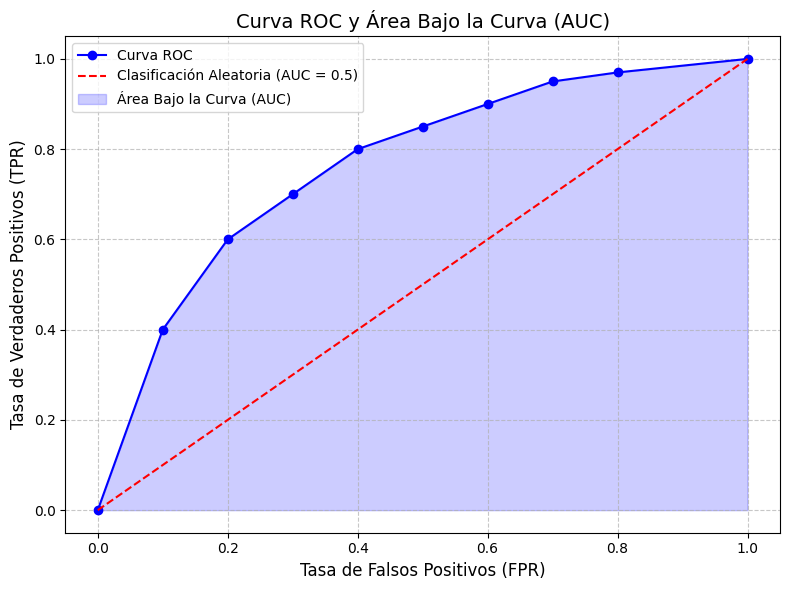

In [24]:
# Datos para la curva ROC
fpr = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
tpr = [0.0, 0.4, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.97, 1.0]

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Clasificación Aleatoria (AUC = 0.5)', color='red')

# Rellenar el área bajo la curva
plt.fill_between(fpr, tpr, alpha=0.2, color='blue', label='Área Bajo la Curva (AUC)')

# Personalización del gráfico
plt.title('Curva ROC y Área Bajo la Curva (AUC)', fontsize=14)
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La curva azul representa el rendimiento del modelo, mientras que la línea roja diagonal muestra el rendimiento de un clasificador aleatorio (AUC = 0.5). El área sombreada bajo la curva azul refleja el valor de AUC, que es una medida del rendimiento general del modelo.

In [25]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)
import matplotlib.pyplot as plt


In [26]:
# Configuramos el entorno de Python en Google Colab
from google.colab import drive
import os

drive.mount("/content/drive")
print(os.getcwd())

os.chdir("/content/drive/My Drive/")
print(os.getcwd())

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Titanic (4).csv')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [ ]:
# Separar características (X) y etiqueta (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar un modelo (Random Forest como ejemplo)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hacer predicciones
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [ ]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

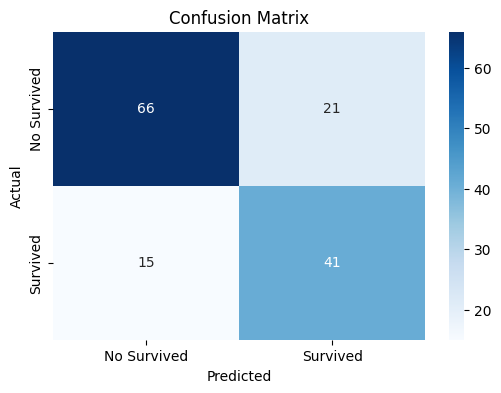

In [ ]:
# Mostrar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Survived", "Survived"], yticklabels=["No Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

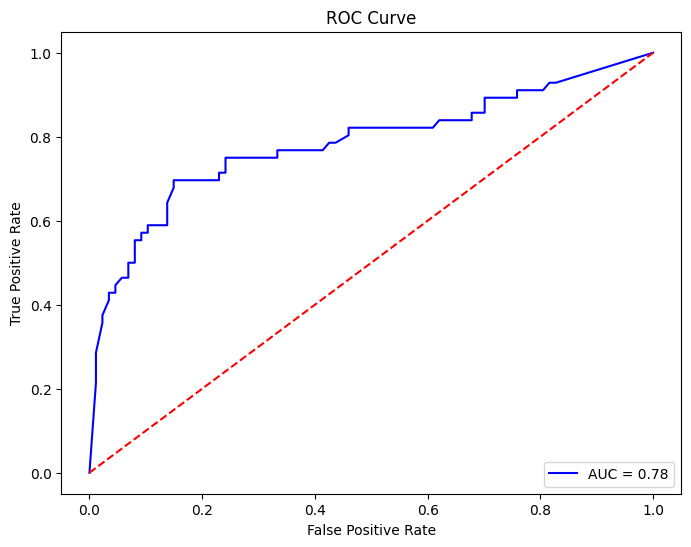

In [ ]:
# Generar y mostrar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Reporte de clasificación
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        87
           1       0.66      0.73      0.69        56

    accuracy                           0.75       143
   macro avg       0.74      0.75      0.74       143
weighted avg       0.75      0.75      0.75       143



In [ ]:
# Mostrar métricas calculadas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.75
Precision: 0.66
Recall: 0.73
F1 Score: 0.69
AUC-ROC: 0.78
